In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize, stats, special
from sklearn.metrics import r2_score

In [11]:
x = np.arange(58.1, 71.96, 0.05)
y = np.array([12, 10, 16, 18, 13, 14, 15, 21, 26, 16, 16, 16, 15, 15, 31, 22, 23, 22, 23, 31, 31, 36, 29, 30, 44, 43, 45, 39, 67, 67, 62, 83, 79, 92, 93, 128, 177, 187, 251, 289, 334, 414, 509, 549, 623, 680, 751, 769, 816, 742, 701, 721, 599, 540, 498, 425, 339, 293, 212, 172, 157, 142, 115, 95, 84, 86, 81, 78, 58, 47, 52, 62, 47, 44, 39, 44, 50, 34, 28, 36, 36, 28, 34, 24, 28, 28, 37, 40, 33, 45, 44, 32, 32, 47, 41, 46, 41, 56, 46, 50, 59, 71, 72, 63, 62, 77, 89, 62, 93, 96, 114, 97, 123, 140, 137, 146, 138, 187, 213, 219, 239, 255, 287, 314, 336, 386, 401, 434, 467, 499, 534, 635, 597, 588, 597, 671, 725, 693, 751, 759, 727, 758, 763, 720, 706, 655, 650, 595, 608, 565, 522, 511, 433, 499, 448, 387, 371, 365, 324, 312, 326, 306, 292, 266, 282, 238, 265, 278, 242, 209, 226, 254, 236, 233, 232, 225, 220, 205, 209, 234, 214, 234, 234, 205, 194, 223, 201, 226, 214, 234, 241, 226, 269, 272, 303, 261, 272, 277, 284, 308, 324, 286, 307, 329, 281, 280, 257, 227, 239, 234, 221, 181, 195, 190, 164, 158, 131, 118, 118, 106, 108, 70, 104, 74, 76, 70, 52, 57, 56, 36, 44, 40, 48, 40, 33, 23, 28, 25, 24, 20, 20, 24, 31, 19, 23, 24, 15, 18, 12, 14, 11, 14, 14, 21, 20, 14, 12, 10, 11, 13, 5, 14, 11, 10, 11, 8, 8, 6, 10, 5, 11, 13, 8, 14, 6, 8, 3, 7])

 - https://stackoverflow.com/questions/77807226/scipy-optimize-curve-fit-does-not-fit-properly

 - https://en.wikipedia.org/wiki/Faddeeva_function
 - https://en.wikipedia.org/wiki/Voigt_profile
 - https://fr.wikipedia.org/wiki/Fonction_de_Voigt
 - https://docs.mantidproject.org/nightly/fitting/fitfunctions/PseudoVoigt.html
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.erfcx.html#scipy.special.erfcx
 - https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.voigt_profile.html

In [12]:
def peak(x, alpha, A, x0, s, b):
    return A * (
        (1 - alpha)*(1 / (s * (np.sqrt(2 * np.pi)))) * np.exp(-0.5 * np.power((x - x0) / s, 2)) + \
        alpha / np.pi * (s / (np.power((x - x0), 2) + np.power(s, 2)))
    ) + b

def voigt(x, sigma, gamma, x0, A):
    z = (x - x0 + 1j * gamma) / (sigma * np.sqrt(2))
    y = special.erfcx(-1j * z) / (sigma * np.sqrt(2 * np.pi))
    return A * np.real(y)

def pseudo_voigt(x, eta, sigma, gamma, x0, A=1.):
    G = stats.norm.pdf(x, scale=sigma, loc=x0)
    L = stats.cauchy.pdf(x, scale=2. * gamma, loc=x0) 
    return A*((1. - eta) * G + eta * L)

def model(x, sigma1, gamma1, x01, A1, sigma2, gamma2, x02, A2, sigma3, gamma3, x03, A3):
    return (
          voigt(x, sigma1, gamma1, x01, A1)
        + voigt(x, sigma2, gamma2, x02, A2)
        + voigt(x, sigma3, gamma3, x03, A3)
    )

In [32]:
bounds_min = [
    0, 0, 60, 0,
    0, 0, 64, 0,
    0, 0, 67, 0,
]
bounds_max = [
    1, 1, 62, np.inf,
    1, 1, 66, np.inf,
    1, 1, 70, np.inf,
]


In [33]:
popt, pcov = optimize.curve_fit(
    model, x, y,
    bounds=(bounds_min, bounds_max)
)

In [34]:
popt

array([2.21959138e-01, 1.65320386e-01, 6.04956801e+01, 7.12019620e+02,
       4.37122515e-01, 4.20861584e-01, 6.51117879e+01, 1.49291511e+03,
       9.32188697e-01, 4.90643611e-14, 6.78851635e+01, 5.82535170e+02])

In [35]:
spopt = np.sqrt(np.diag(pcov))
spopt

array([1.25868563e-02, 1.60273203e-02, 3.61241349e-03, 1.25557981e+01,
       2.54260436e-02, 3.40608314e-02, 6.85699895e-03, 3.19467061e+01,
       6.85809246e-02, 1.30035722e-01, 2.30005556e-02, 3.31566917e+01])

In [36]:
rsd = spopt / popt
rsd

array([5.67079888e-02, 9.69470290e-02, 5.97135777e-05, 1.76340619e-02,
       5.81668589e-02, 8.09311962e-02, 1.05311176e-04, 2.13988766e-02,
       7.35697878e-02, 2.65030908e+12, 3.38815648e-04, 5.69179225e-02])

In [37]:
xlin = np.linspace(x.min(), x.max(), 500)
yhat = model(xlin, *popt)

In [38]:
score = r2_score(y, model(x, *popt))
score

0.9914383339892325

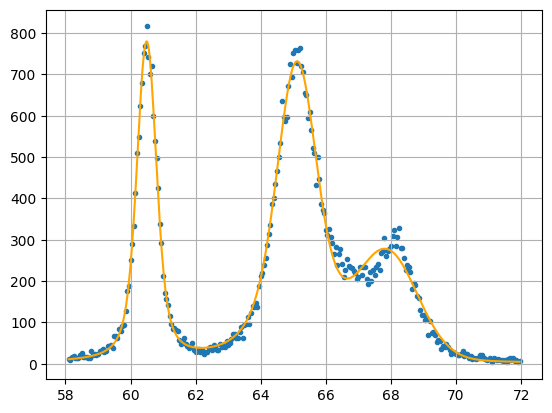

In [39]:
fig, axe = plt.subplots()
axe.scatter(x, y, marker=".")
#axe.plot(xlin, peak(xlin, *popt[0:4]), "--", color="gray")
#axe.plot(xlin, peak(xlin, *popt[4:8]), "--", color="gray")
#axe.plot(xlin, peak(xlin, *popt[8:12]), "--", color="gray")
axe.plot(xlin, yhat, color="orange")
axe.grid()